# Project_2
Name:George Kameel Barsoum<br>
Section :2<br>
Department: Computer science<br>
Id:2016170144<br>

## PART ONE: Data Wrangling
Here we open the SQL database using Python<br>
We add Winning Rate coulumn by eqation winningTimes/totalgameplayed*100<br>
We add anew column CompID wich I used to compose TeamId,and Year to Join it with the new table I create<br>




In [2]:
import sqlite3
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy
sns.set(rc={'figure.figsize':(20,20)})


conn = sqlite3.connect("lahman2014.sqlite")
Teams = pd.read_sql_query("SELECT * FROM Teams", conn)
Teams.to_csv('Teams.csv', index = False)
newcol=[]
winrate=[]
for i in Teams.iterrows():
    temp=i[1]
    newcol.append(temp['teamID']+str(temp['yearID']))
    winrate.append((temp['W']/temp['G'])*100)
Teams['CompID'] = newcol
Teams['WinningRate'] = winrate
Teams


Bad key "text.kerning_factor" on line 4 in
C:\Users\GeorgeKameelBarsoum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,CompID,WinningRate
0,1871,NA,BS1,BNA,None,3,31,NaN,20,10,...,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1,BS11871,64.516129
1,1871,NA,CH1,CNA,None,2,28,NaN,19,9,...,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1,CH11871,67.857143
2,1871,NA,CL1,CFC,None,8,29,NaN,10,19,...,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1,CL11871,34.482759
3,1871,NA,FW1,KEK,None,7,19,NaN,7,12,...,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1,FW11871,36.842105
4,1871,NA,NY2,NNA,None,5,33,NaN,16,17,...,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2,NY21871,48.484848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,2014,NL,PIT,PIT,C,2,162,81.0,88,74,...,Pittsburgh Pirates,PNC Park,2442564.0,98,97,PIT,PIT,PIT,PIT2014,54.320988
2771,2014,NL,SDN,SDP,W,3,162,81.0,77,85,...,San Diego Padres,Petco Park,2195373.0,91,91,SDP,SDN,SDN,SDN2014,47.530864
2772,2014,NL,SFN,SFG,W,2,162,81.0,88,74,...,San Francisco Giants,AT&T Park,3368697.0,95,95,SFG,SFN,SFN,SFN2014,54.320988
2773,2014,NL,SLN,STL,C,1,162,81.0,90,72,...,St. Louis Cardinals,Busch Stadium III,3540649.0,101,100,STL,SLN,SLN,SLN2014,55.555556


Here I open  Players table then calculating the total salaries for each Team in each Year <br>
Then I made add anew column CompID wich I used to compose TeamId,and Year

In [3]:
Players = pd.read_sql_query("SELECT * FROM Salaries", conn)
Players.to_csv('Players.csv', index = False)

sumSalariesDF = Players.groupby(['teamID', 'yearID']).sum()

teamID=[]
yearID=[]
Totalpay=[]
comp=[]
sumSalariesDF
for i in sumSalariesDF.iterrows():
    x=i[1]
    y=i[0]
    comp.append(y[0]+str(y[1]))
    teamID.append(y[0])
    yearID.append(y[1])
    Totalpay.append(x['salary'])
    
teamID = pd.Series(teamID)
yearID = pd.Series(yearID)
Totalpay = pd.Series(Totalpay)
frame = {'CompID':comp, 'teamID': teamID, 'yearID': yearID, 'Payroll': Totalpay} 
  
result = pd.DataFrame(frame) 
result


,CompID,teamID,yearID,Payroll
0,ANA1997,ANA,1997,31135472.0
1,ANA1998,ANA,1998,41281000.0
2,ANA1999,ANA,1999,55388166.0
3,ANA2000,ANA,2000,51464167.0
4,ANA2001,ANA,2001,47535167.0
...,...,...,...,...
855,WAS2010,WAS,2010,61400000.0
856,WAS2011,WAS,2011,63856928.0
857,WAS2012,WAS,2012,80855143.0
858,WAS2013,WAS,2013,113703270.0


Here I join The two tables on the new created column <br>
but it has adraw back some data is removed
<ul>
    <li> We cannot restore it because it completly missing at random as all the the old data we coildn't get
        as it is to old and we don't have any data for the player tp compute it</li>
    <li>We already have alot of newer and complete data</li>
   
</ul>

In [4]:
newfr = pd.merge(Teams,
                result ,
                 on='CompID')
newfr

,yearID_x,lgID,teamID_x,franchID,divID,Rank,G,Ghome,W,L,...,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,CompID,WinningRate,teamID_y,yearID_y,Payroll
0,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,97,97,BAL,BAL,BAL,BAL1985,51.552795,BAL,1985,11560712.0
1,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,104,104,BOS,BOS,BOS,BOS1985,49.693252,BOS,1985,10897560.0
2,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,100,100,CAL,CAL,CAL,CAL1985,55.555556,CAL,1985,14427894.0
3,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,104,104,CHW,CHA,CHA,CHA1985,52.147239,CHA,1985,9846178.0
4,1985,AL,CLE,CLE,E,7,162,81.0,60,102,...,99,100,CLE,CLE,CLE,CLE1985,37.037037,CLE,1985,6551666.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,2014,NL,PIT,PIT,C,2,162,81.0,88,74,...,98,97,PIT,PIT,PIT,PIT2014,54.320988,PIT,2014,77178000.0
854,2014,NL,SDN,SDP,W,3,162,81.0,77,85,...,91,91,SDP,SDN,SDN,SDN2014,47.530864,SDN,2014,75685700.0
855,2014,NL,SFN,SFG,W,2,162,81.0,88,74,...,95,95,SFG,SFN,SFN,SFN2014,54.320988,SFN,2014,20000000.0
856,2014,NL,SLN,STL,C,1,162,81.0,90,72,...,101,100,STL,SLN,SLN,SLN2014,55.555556,SLN,2014,120693000.0


Here I clean the new Table with Un needed columns

In [5]:
newfr=newfr[['yearID_x','lgID','teamID_x','franchID','Rank','G','W','L','Payroll','WinningRate']]

newfr.to_csv('TeamsSalary.csv', index = False)
newfr

,yearID_x,lgID,teamID_x,franchID,Rank,G,W,L,Payroll,WinningRate
0,1985,AL,BAL,BAL,4,161,83,78,11560712.0,51.552795
1,1985,AL,BOS,BOS,5,163,81,81,10897560.0,49.693252
2,1985,AL,CAL,ANA,2,162,90,72,14427894.0,55.555556
3,1985,AL,CHA,CHW,3,163,85,77,9846178.0,52.147239
4,1985,AL,CLE,CLE,7,162,60,102,6551666.0,37.037037
...,...,...,...,...,...,...,...,...,...,...
853,2014,NL,PIT,PIT,2,162,88,74,77178000.0,54.320988
854,2014,NL,SDN,SDP,3,162,77,85,75685700.0,47.530864
855,2014,NL,SFN,SFG,2,162,88,74,20000000.0,54.320988
856,2014,NL,SLN,STL,1,162,90,72,120693000.0,55.555556


# PART TWO: Exploratory Data Analysis
Here I filter the data frame by the year "Take years from 1990-2013"<br>
then make list of data frames Filtered by name

In [1]:
newfr=newfr[newfr.yearID_x >= 1990]

teamdf=[]

teams_list=newfr['teamID_x'].unique().tolist()
for name in teams_list:
    teamdf.append(newfr.loc[newfr['teamID_x']==name])


NameError: name 'newfr' is not defined

### Payroll distribution
Here I plot the the payroll for each team with respect of years

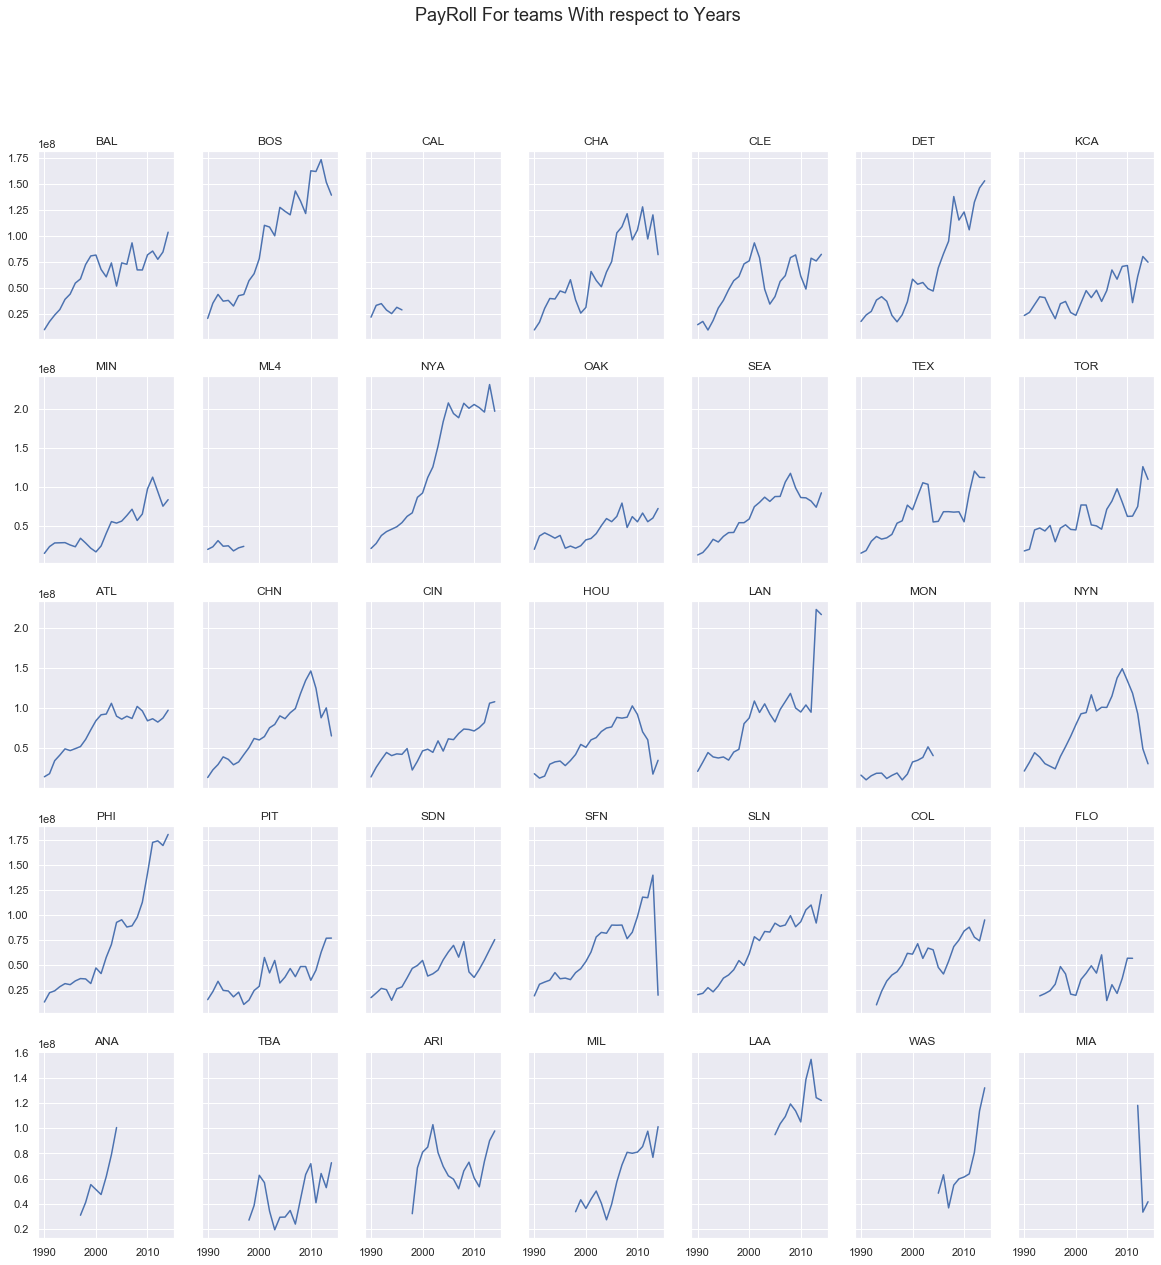

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 7, sharex='col', sharey='row',figsize=(20,20))
fig.suptitle('PayRoll For teams With respect to Years',fontsize=18)
count=0
for i in range(5):
    for j in range(7):
        temp =teamdf[count]
        ax[i,j].plot(temp['yearID_x'],temp['Payroll'])
        ax[i,j].set_title(teams_list[count])
        count+=1



Here we plot the the payroll of all Teams over Years
Most teams tend to increase their payroll over Years

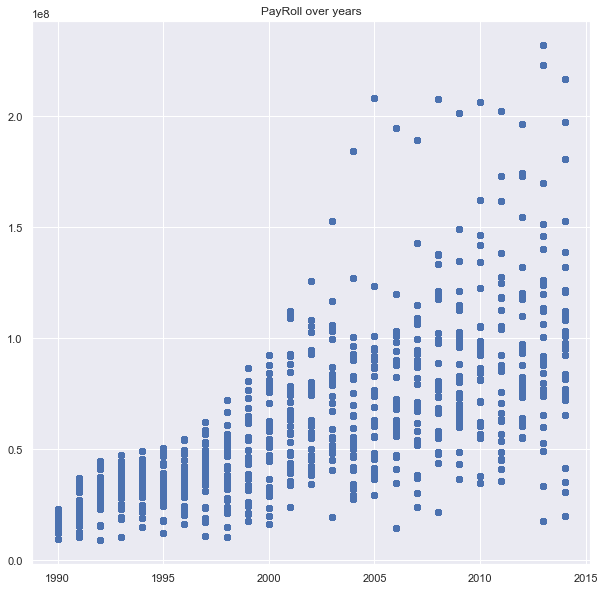

In [22]:
import seaborn as sns
x=[]
y=[]
for team in newfr.iterrows():
    x.append(newfr.yearID_x)
    y.append(newfr.Payroll)




plt.scatter(x,y)
plt.title('PayRoll over years')
plt.show()


From the previous 2 Plots we conclude<br>
1-Most teams tend to increase its payroll<br>
2-The payroll increases over time <br>
3-The difference  in Payroll  between Years increases over time <br>

### Correlation between payroll and winning percentage
Here I discretize years into five time-periods<br>
then I get the mean payroll for each years 


In [10]:
standateamdf=[]
syear=0
for team in teamdf:
    count =1
    
    startyearid=[]
    endyearid=[]
    teamid=[]
    payroll=[]
    winningrate=[]
    
    sumpayroll =0
    sumwin=0
    maxi=len(team)
    itr=1
    for x in team.iterrows():
        i=x[1]
        if count ==6 or  maxi==itr:
            if count==6:
                num=5
            else:
                num=count
            eyear=i['yearID_x']
            startyearid.append(syear)
            endyearid.append(eyear)
            teamid.append(i['teamID_x'])
            payroll.append(sumpayroll/num)
            winningrate.append(sumwin/num)
            count=1
           
            sumpayroll =0
            sumwin=0   
        if count==1:
            syear=i['yearID_x']
            
        sumwin+=i['WinningRate']
        sumpayroll+=i['Payroll']
        count+=1
        itr+=1
    startyearid = pd.Series(startyearid)
    endyearid = pd.Series(endyearid)
    teamid = pd.Series(teamid)
    payroll = pd.Series(payroll)
    winningrate= pd.Series(winningrate)
    
    frame = {'Startyear':startyearid, 'EndYear':  endyearid, 'TeamID': teamid, 'Payroll': payroll,"WinningRate":winningrate}
    frame = pd.DataFrame(frame) 
    standateamdf.append(frame)

The Next 5 plots it will illustrate the Payroll vs Winning Rate for each all Teams

The Start year=1990----1995
The Pay Roll=33981300.2
The Winnig Rate =52.28070175438596


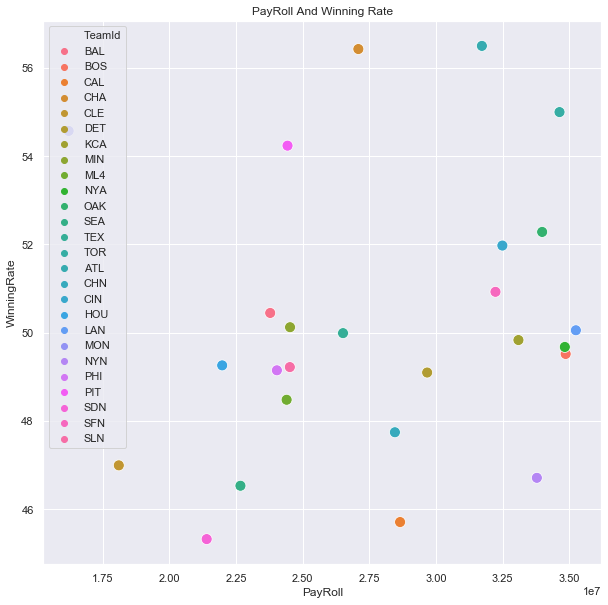

In [21]:
x=[]
y=[]
l=[]
xok=[]
yok=[]
for team in standateamdf:
    for z in team.iterrows():
        temp=z[1]
        if temp.Startyear == 1990:
            x.append(temp.Payroll)
            y.append(temp.WinningRate)
            l.append(temp.TeamID)
        if temp.TeamID=="OAK"and temp.Startyear == 1990 :
            print("The Start year="+str(temp.Startyear)+"----"+str(temp.EndYear))
            print("The Pay Roll="+str(temp.Payroll))
            print("The Winnig Rate ="+str(temp.WinningRate))
            xok.append(temp.Payroll)
            yok.append(temp.WinningRate)
frame = {'TeamId':l, 'PayRoll': x, 'WinningRate': y } 
  
result = pd.DataFrame(frame)   

#plt.scatter(x, y)
#plt.scatter(xok, yok)
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x= 'PayRoll', y='WinningRate',  hue='TeamId', data=result,s=120)
plt.title('PayRoll And Winning Rate')
plt.show()


In Period 1990 to 1995
It appears tha okland performance is Good<br>
Some Teams Pay smaller amount of money and get better winnig rates

The Start year=1995----2000
The Pay Roll=25747111.6
The Winnig Rate =46.83641975308642


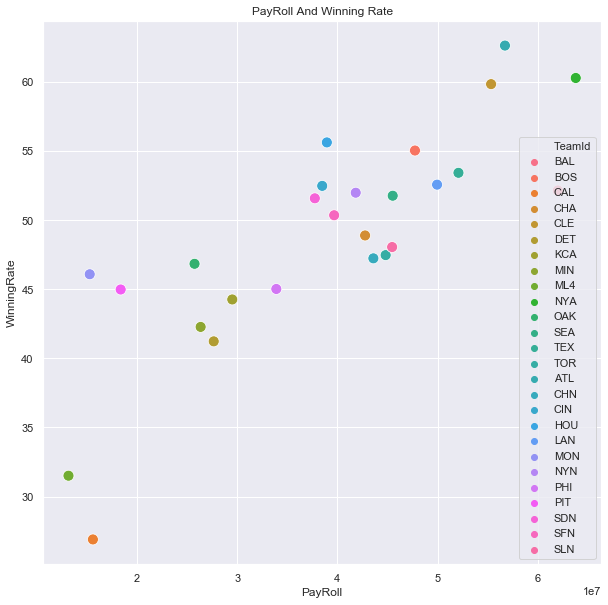

In [23]:
x=[]
y=[]
l=[]
xok=[]
yok=[]
for team in standateamdf:
    for z in team.iterrows():
        temp=z[1]
        if temp.Startyear == 1995:
            x.append(temp.Payroll)
            y.append(temp.WinningRate)
            l.append(temp.TeamID)
        if temp.TeamID=="OAK"and temp.Startyear == 1995 :
            print("The Start year="+str(temp.Startyear)+"----"+str(temp.EndYear))
            print("The Pay Roll="+str(temp.Payroll))
            print("The Winnig Rate ="+str(temp.WinningRate))
            xok.append(temp.Payroll)
            yok.append(temp.WinningRate)
            

frame = {'TeamId':l, 'PayRoll': x, 'WinningRate': y } 
  
result = pd.DataFrame(frame)   

#plt.scatter(x, y)
#plt.scatter(xok, yok)
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x= 'PayRoll', y='WinningRate',  hue='TeamId', data=result,s=120)
plt.title('PayRoll And Winning Rate')
plt.show()


In Period 1995 to 2000
It appears tha okland performance is not Good<br>
In this period the more you pay the more winning rate you get

The Start year=2000----2005
The Pay Roll=43094550.2
The Winnig Rate =59.69940955448202


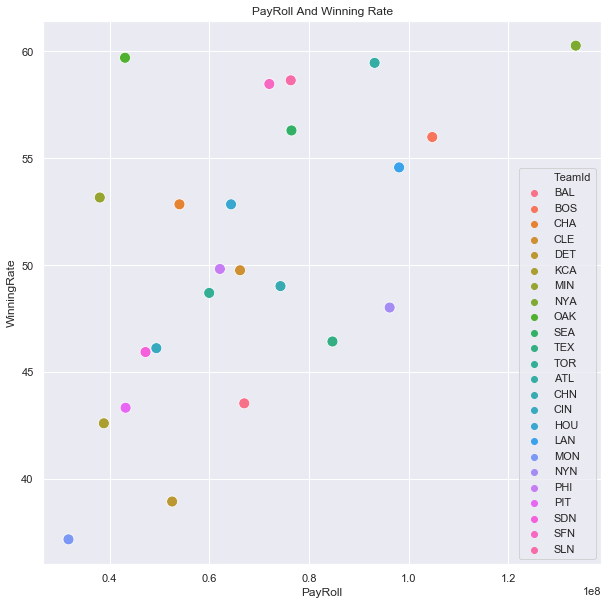

In [24]:
x=[]
y=[]
l=[]
xok=[]
yok=[]
for team in standateamdf:
    for z in team.iterrows():
        temp=z[1]
        if temp.Startyear == 2000:
            x.append(temp.Payroll)
            y.append(temp.WinningRate)
            l.append(temp.TeamID)
        if temp.TeamID=="OAK"and temp.Startyear == 2000 :
            print("The Start year="+str(temp.Startyear)+"----"+str(temp.EndYear))
            print("The Pay Roll="+str(temp.Payroll))
            print("The Winnig Rate ="+str(temp.WinningRate))
            xok.append(temp.Payroll)
            yok.append(temp.WinningRate)
frame = {'TeamId':l, 'PayRoll': x, 'WinningRate': y } 
  
result = pd.DataFrame(frame)   

#plt.scatter(x, y)
#plt.scatter(xok, yok)
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x= 'PayRoll', y='WinningRate',  hue='TeamId', data=result,s=120)
plt.title('PayRoll And Winning Rate')
plt.show()

In Period  2000 to 2005
It appears tha okland performanc is very Good here okland didn't pay so much <br>
 Teams Pay more amount of money and get better winnig rates but there are some exceptions

The Start year=2005----2010
The Pay Roll=61382581.4
The Winnig Rate =50.30442450732306


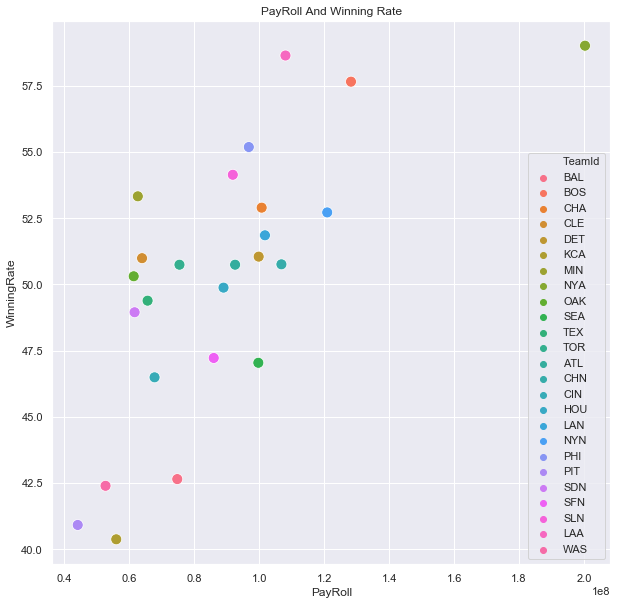

In [25]:
x=[]
y=[]
l=[]
xok=[]
yok=[]
for team in standateamdf:
    for z in team.iterrows():
        temp=z[1]
        if temp.Startyear == 2005:
            x.append(temp.Payroll)
            y.append(temp.WinningRate)
            l.append(temp.TeamID)
        if temp.TeamID=="OAK"and temp.Startyear == 2005 :
            print("The Start year="+str(temp.Startyear)+"----"+str(temp.EndYear))
            print("The Pay Roll="+str(temp.Payroll))
            print("The Winnig Rate ="+str(temp.WinningRate))
            xok.append(temp.Payroll)
            yok.append(temp.WinningRate)
frame = {'TeamId':l, 'PayRoll': x, 'WinningRate': y } 
  
result = pd.DataFrame(frame)   

#plt.scatter(x, y)
#plt.scatter(xok, yok)
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x= 'PayRoll', y='WinningRate',  hue='TeamId', data=result,s=120)
plt.title('PayRoll And Winning Rate')
plt.show()

In Period  2005 to 2010
It appears tha okland performanc is avarage here okland didn't pay so much<br>
Still Teams Pay more amount of money and get better winnig rates but there are some exceptions

The Start year=2010----2014
The Pay Roll=47459280.0
The Winnig Rate =42.59259259259259


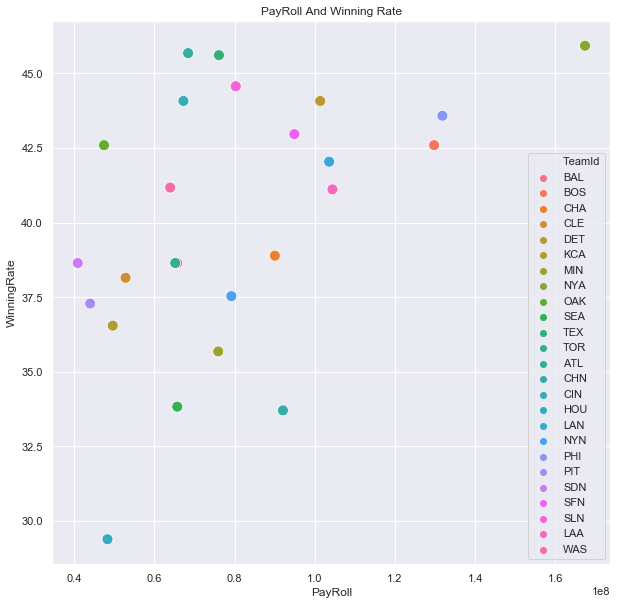

In [26]:
x=[]
y=[]
l=[]
xok=[]
yok=[]
for team in standateamdf:
    for z in team.iterrows():
        temp=z[1]
        if temp.Startyear == 2010:
            x.append(temp.Payroll)
            y.append(temp.WinningRate)
            l.append(temp.TeamID)
        if temp.TeamID=="OAK"and temp.Startyear == 2010 :
            print("The Start year="+str(temp.Startyear)+"----"+str(temp.EndYear))
            print("The Pay Roll="+str(temp.Payroll))
            print("The Winnig Rate ="+str(temp.WinningRate))
            xok.append(temp.Payroll)
            yok.append(temp.WinningRate)
frame = {'TeamId':l, 'PayRoll': x, 'WinningRate': y } 
  
result = pd.DataFrame(frame)   

#plt.scatter(x, y)
#plt.scatter(xok, yok)
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x= 'PayRoll', y='WinningRate',  hue='TeamId', data=result,s=120)
plt.title('PayRoll And Winning Rate')
plt.show()

In Period  2010 to 2014
It appears tha okland performance is Good here okland didn't pay so muche<br>
Still Teams Pay more amount of money and get better winnig rates but there are some exceptions

As we saw in the first perod it is not a rule that the more you pay the more winnig rate you will get
may be that is because the differnce in paying in the far years is smaller so we need to standarize our data
      
       

        
        
        

## PART THREE: Data Transformations 

### Standardizing across years
Here we standarized the pay roll 
then we repeated the polt of teams payroll across the years

In [33]:
import statistics 

sumpayroll=0
count=0
values=[]
for team in newfr.iterrows():
    temp=team[1]
    #print(temp)
 
    sumpayroll+=temp['Payroll']
    values.append(temp['Payroll'])
   
    count+=1
avgpayroll=sumpayroll/count
standerdev=statistics.stdev(values)
newfr['Payroll']=(newfr['Payroll']-avgpayroll)/standerdev


C:\Users\GeorgeKameelBarsoum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


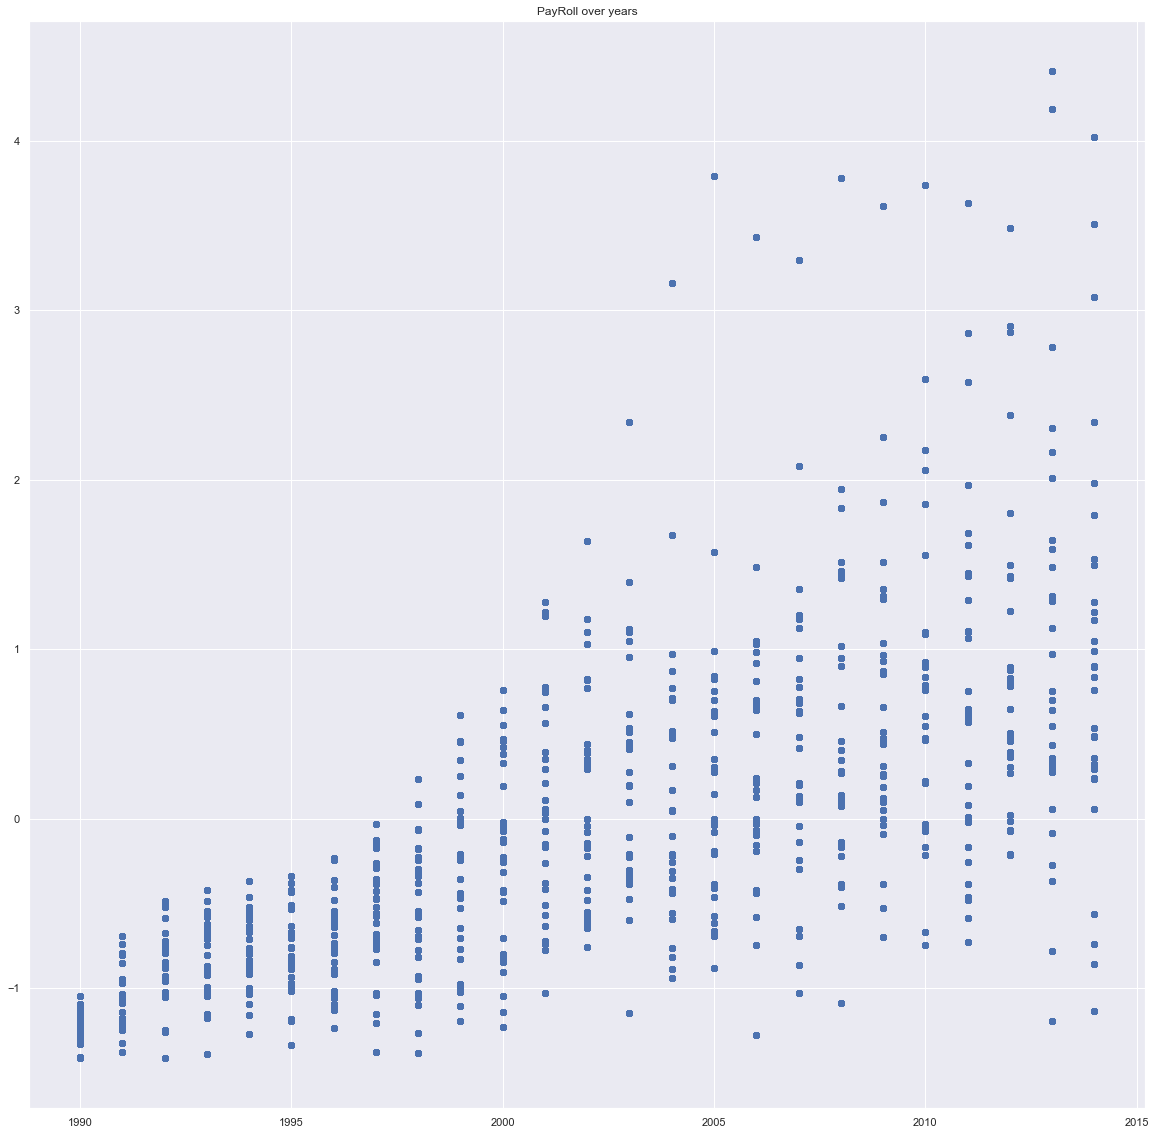

In [34]:
x=[]
y=[]

for team in newfr.iterrows():
    x.append(newfr.yearID_x)
    y.append(newfr.Payroll)


plt.scatter(x, y)
plt.title('PayRoll over years')
plt.show()
  


After standerlization the difference btween the payrolls beacame bigger 
so it will be cleaner to analyize this data



Then I repeated the previous plots with standarized data and regression 
and I came with the same observations


In [35]:
newfr=newfr[newfr.yearID_x >= 1990]

teamdf=[]

teams_list=newfr['teamID_x'].unique().tolist()
for name in teams_list:
    teamdf.append(newfr.loc[newfr['teamID_x']==name])

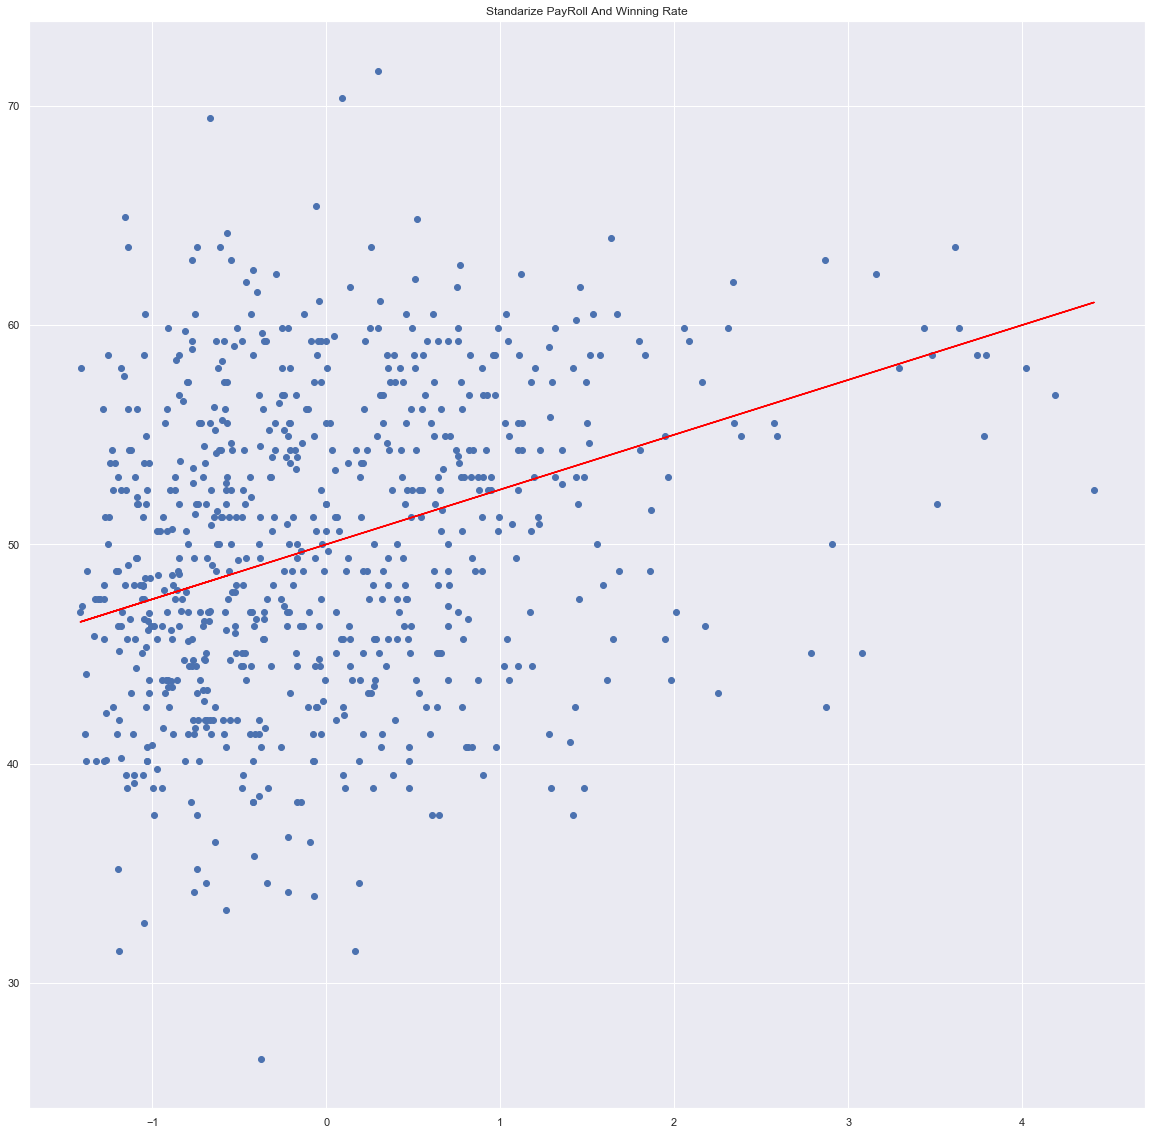

In [36]:
x=[]
y=[]
y2=[]
for team in teamdf:
    for z in team.iterrows():
        temp=z[1]
        x.append(temp.Payroll)
        y.append(temp.WinningRate)
        y2.append(50+2.5*temp.Payroll)
sns.set(rc={'figure.figsize':(20,20)})
        
plt.scatter(x, y)

plt.plot(x, y2,color='red')
plt.title('Standarize PayRoll And Winning Rate')
plt.show()

The Nest plot explain the effiecency of of the teams during periods

In [18]:

    
standateamdf=[]
syear=0
for team in teamdf:
    count =1
    
    startyearid=[]
    endyearid=[]
    teamid=[]
    payroll=[]
    winningrate=[]
    
    sumpayroll =0
    sumwin=0
    maxi=len(team)
    itr=1
    
  

    for x in team.iterrows():
        i=x[1]
      
   
        if count ==6 or  maxi==itr:
            if count==6:
                num=5
            else:
                num=count
            eyear=i['yearID_x']
            startyearid.append(syear)
            endyearid.append(eyear)
            teamid.append(i['teamID_x'])
            payroll.append(sumpayroll/num)
            winningrate.append(sumwin/num)
            count=1
           
            sumpayroll =0
            sumwin=0
            
                 
        if count==1:
            syear=i['yearID_x']
            
        sumwin+=i['WinningRate']
        sumpayroll+=i['Payroll']
        count+=1
        itr+=1
    startyearid = pd.Series(startyearid)
    endyearid = pd.Series(endyearid)
    teamid = pd.Series(teamid)
    payroll = pd.Series(payroll)
    winningrate= pd.Series(winningrate)
    
    frame = {'Startyear':startyearid, 'EndYear':  endyearid, 'TeamID': teamid, 'Payroll': payroll,"WinningRate":winningrate}
    frame = pd.DataFrame(frame) 
    standateamdf.append(frame)

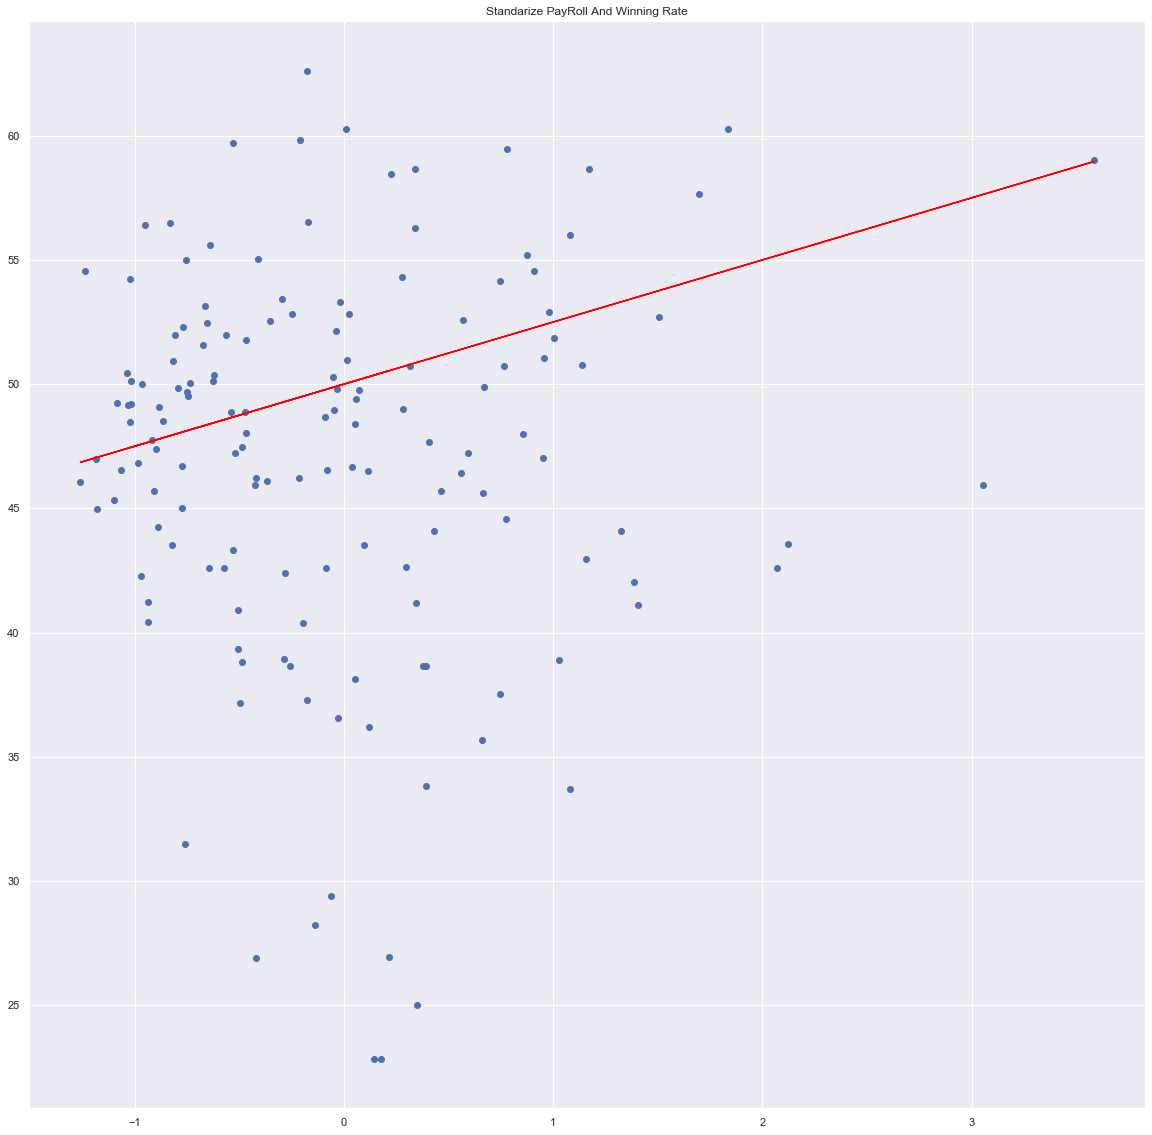

In [19]:
x=[]
y=[]
y2=[]
for team in  standateamdf:
    for z in team.iterrows():
        temp=z[1]
        x.append(temp.Payroll)
        y.append(temp.WinningRate)
        y2.append(50+2.5*temp.Payroll)
        
plt.scatter(x, y)
plt.plot(x, y2,color='red')

plt.title('Standarize PayRoll And Winning Rate')

plt.show()

The Start year=1990----1995
The Pay Roll=-0.7699960684169354
The Winnig Ratr =52.28070175438596


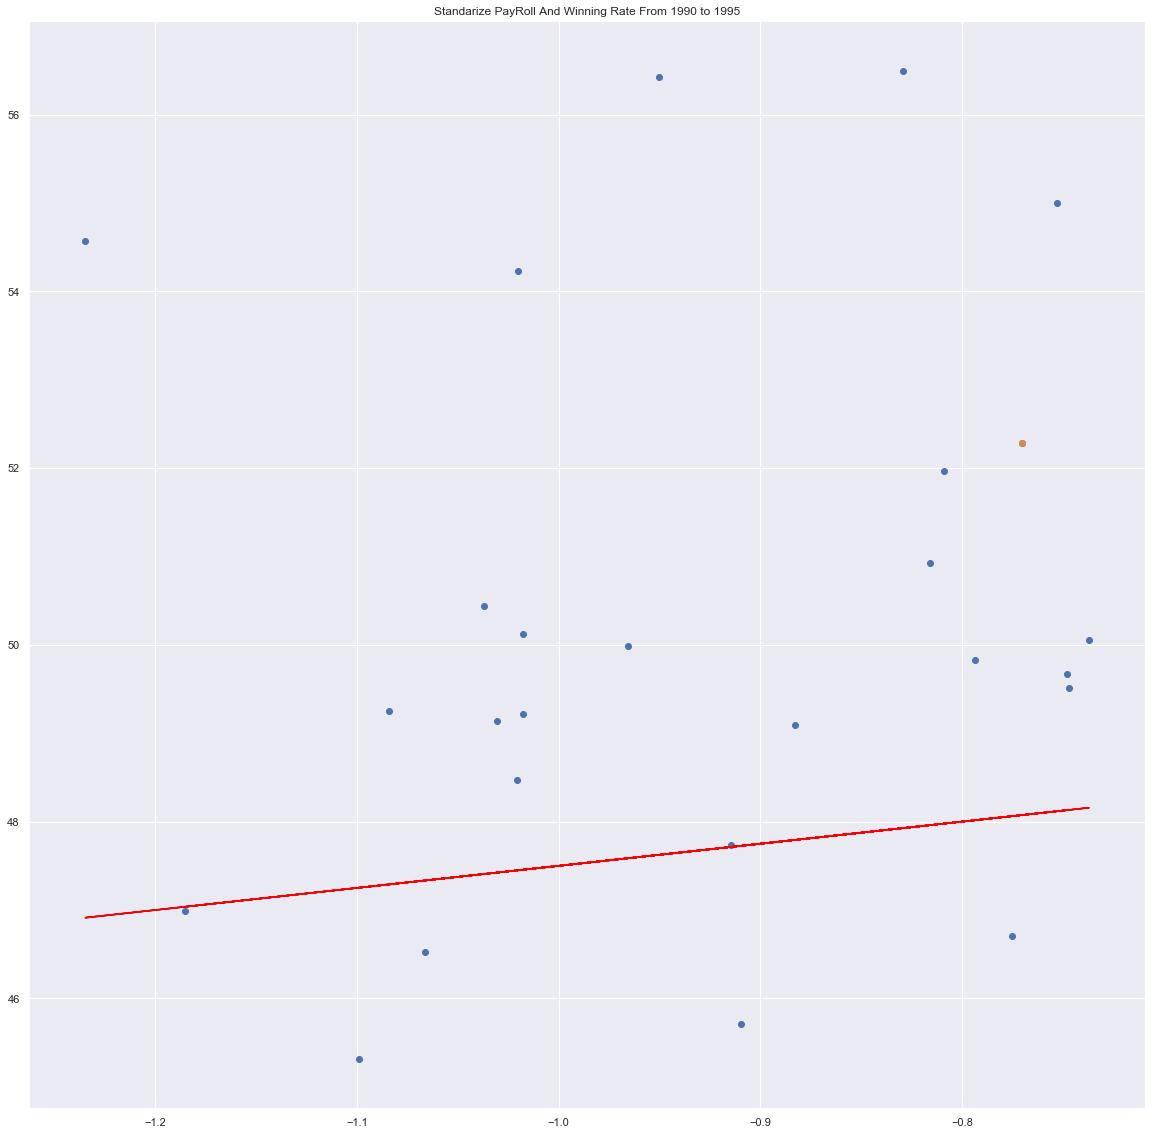

In [20]:
x=[]
y=[]
y2=[]
xok=[]
yok=[]
for team in standateamdf:
    for z in team.iterrows():
        temp=z[1]
        if temp.Startyear == 1990:
            x.append(temp.Payroll)
            y.append(temp.WinningRate)
            y2.append(50+2.5*temp.Payroll)
        if temp.TeamID=="OAK"and temp.Startyear == 1990 :
            print("The Start year="+str(temp.Startyear)+"----"+str(temp.EndYear))
            print("The Pay Roll="+str(temp.Payroll))
            print("The Winnig Ratr ="+str(temp.WinningRate))
            xok.append(temp.Payroll)
            yok.append(temp.WinningRate)

plt.scatter(x, y)
plt.plot(x, y2)
plt.plot(x, y2,color='red')
plt.scatter(xok, yok)
plt.title('Standarize PayRoll And Winning Rate From 1990 to 1995')
plt.show()


The Start year=1995----2000
The Pay Roll=-0.9855303340605595
The Winnig Ratr =46.83641975308642


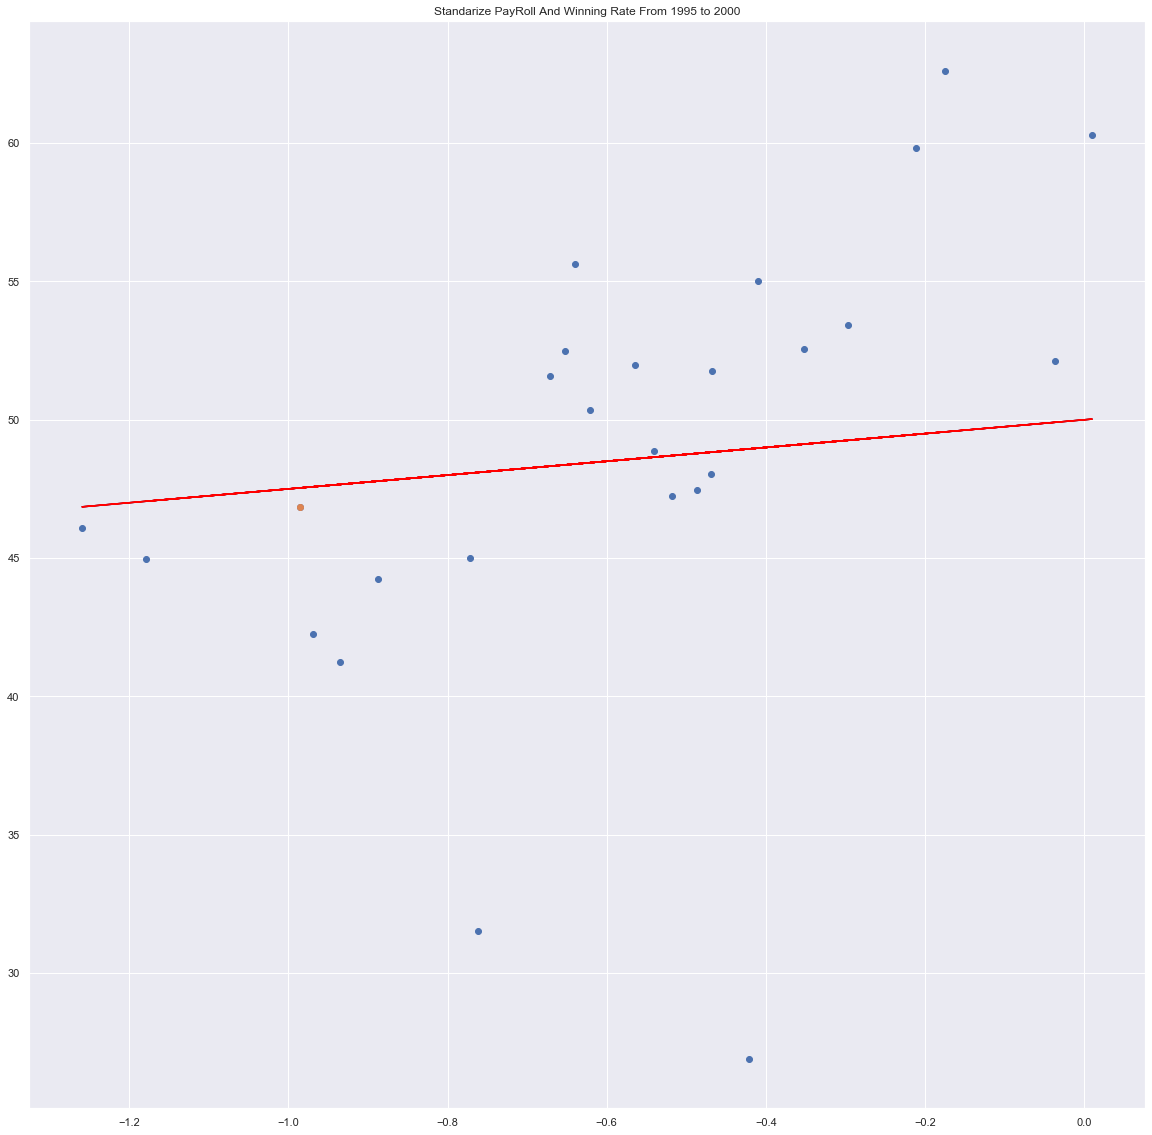

In [21]:
x=[]
y=[]
y2=[]
xok=[]
yok=[]
for team in standateamdf:
    for z in team.iterrows():
        temp=z[1]
        if temp.Startyear == 1995:
            x.append(temp.Payroll)
            y.append(temp.WinningRate)
            y2.append(50+2.5*temp.Payroll)
        if temp.TeamID=="OAK"and temp.Startyear == 1995 :
            print("The Start year="+str(temp.Startyear)+"----"+str(temp.EndYear))
            print("The Pay Roll="+str(temp.Payroll))
            print("The Winnig Ratr ="+str(temp.WinningRate))
            xok.append(temp.Payroll)
            yok.append(temp.WinningRate)

plt.scatter(x, y)
plt.plot(x, y2)
plt.plot(x, y2,color='red')
plt.scatter(xok, yok)
plt.title('Standarize PayRoll And Winning Rate From 1995 to 2000')
plt.show()

The Start year=2000----2005
The Pay Roll=-0.5314519031330897
The Winnig Ratr =59.69940955448202


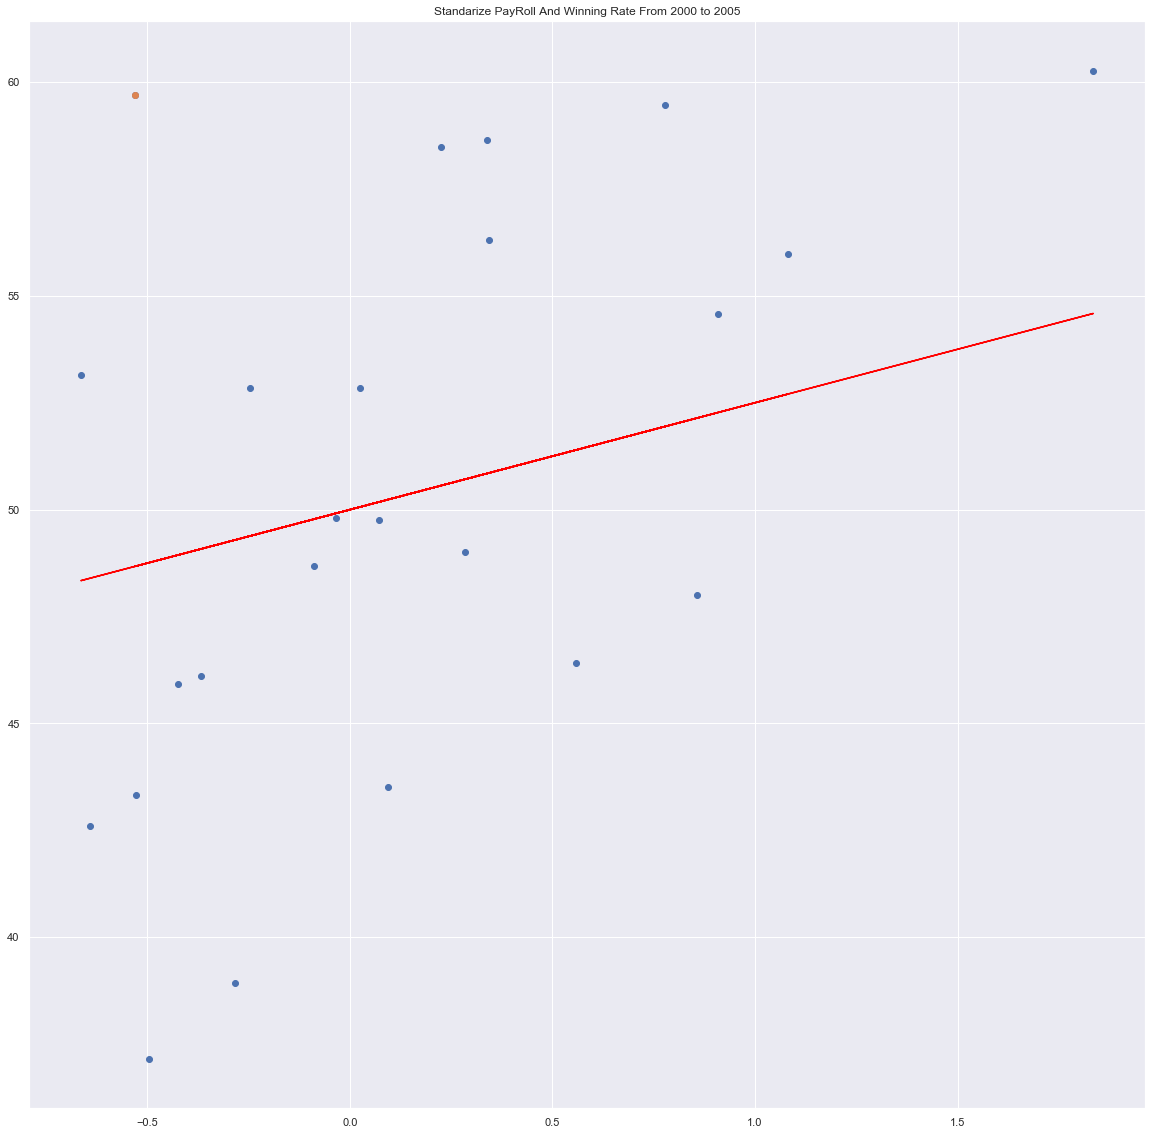

In [22]:
x=[]
y=[]
y2=[]
xok=[]
yok=[]
for team in standateamdf:
    for z in team.iterrows():
        temp=z[1]
        if temp.Startyear == 2000:
            x.append(temp.Payroll)
            y.append(temp.WinningRate)
            y2.append(50+2.5*temp.Payroll)
        if temp.TeamID=="OAK"and temp.Startyear == 2000 :
            print("The Start year="+str(temp.Startyear)+"----"+str(temp.EndYear))
            print("The Pay Roll="+str(temp.Payroll))
            print("The Winnig Ratr ="+str(temp.WinningRate))
            xok.append(temp.Payroll)
            yok.append(temp.WinningRate)

plt.scatter(x, y)
plt.plot(x, y2,color='red')
plt.scatter(xok, yok)
plt.title('Standarize PayRoll And Winning Rate From 2000 to 2005')
plt.show()

The Start year=2005----2010
The Pay Roll=-0.052752960682380515
The Winnig Ratr =50.30442450732306


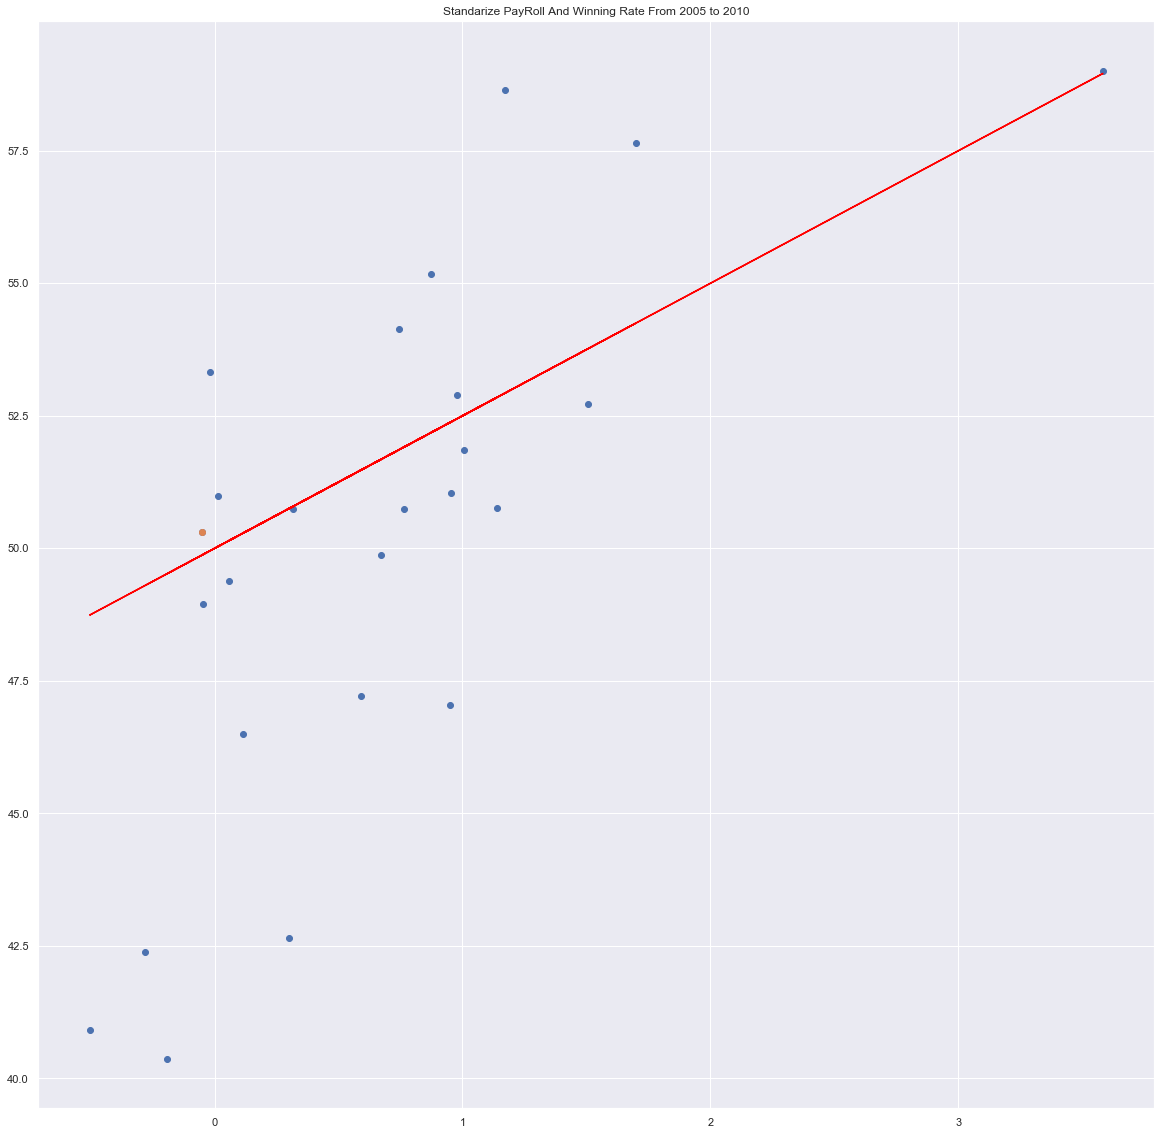

In [23]:
x=[]
y=[]
y2=[]
xok=[]
yok=[]
for team in standateamdf:
    for z in team.iterrows():
        temp=z[1]
        if temp.Startyear == 2005:
            x.append(temp.Payroll)
            y.append(temp.WinningRate)
            y2.append(50+2.5*temp.Payroll)
        if temp.TeamID=="OAK"and temp.Startyear == 2005 :
            print("The Start year="+str(temp.Startyear)+"----"+str(temp.EndYear))
            print("The Pay Roll="+str(temp.Payroll))
            print("The Winnig Ratr ="+str(temp.WinningRate))
            xok.append(temp.Payroll)
            yok.append(temp.WinningRate)

plt.scatter(x, y)
plt.plot(x, y2,color='red')
plt.scatter(xok, yok)
plt.title('Standarize PayRoll And Winning Rate From 2005 to 2010')
plt.show()

The Start year=2010----2014
The Pay Roll=-0.08530784484165595
The Winnig Ratr =42.59259259259259


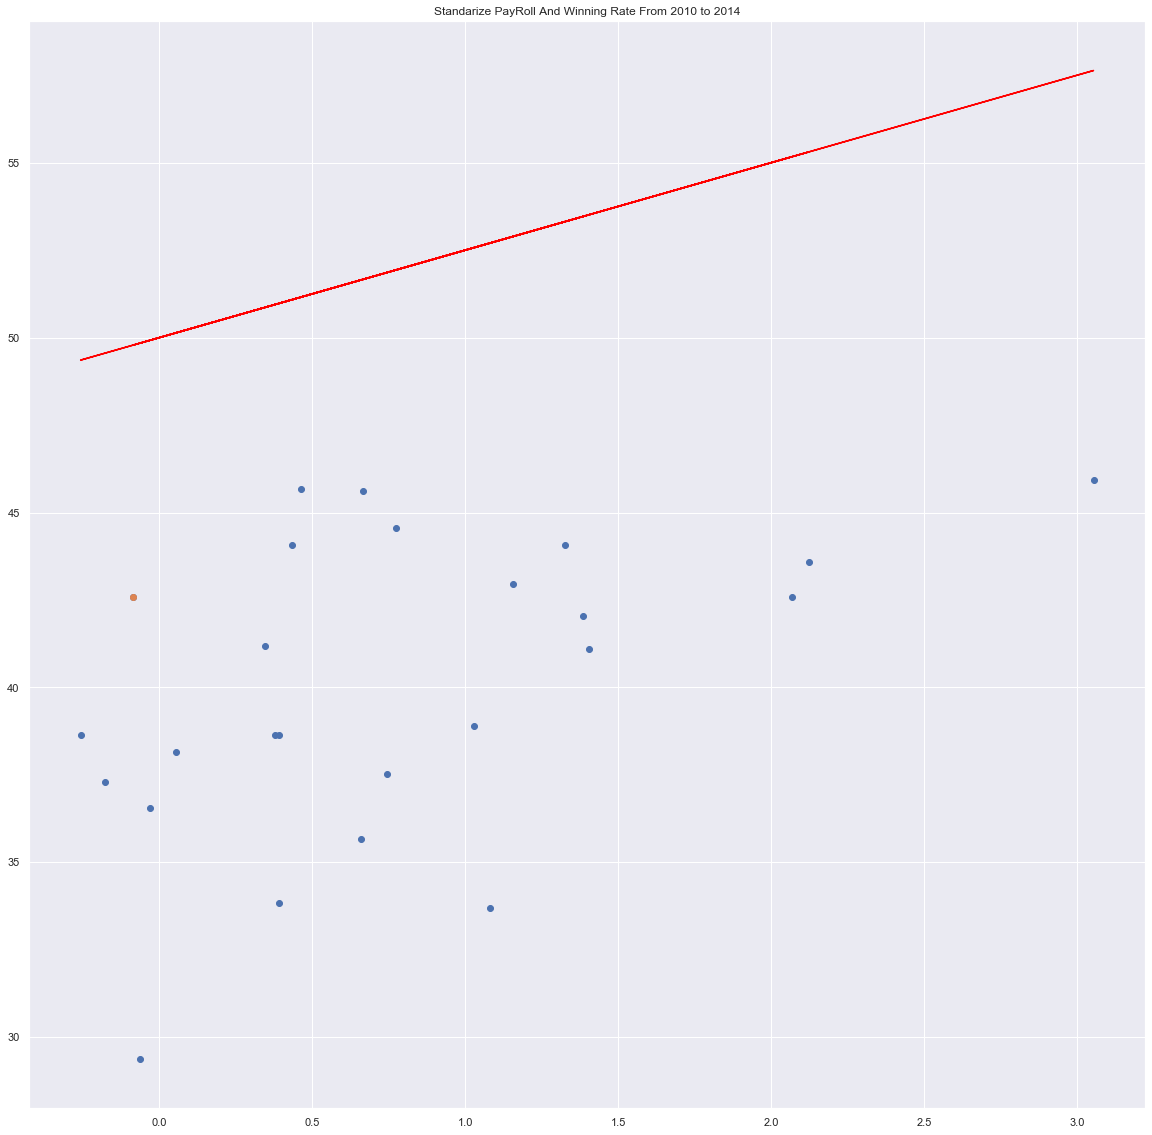

In [24]:
x=[]
y=[]
y2=[]
xok=[]
yok=[]
for team in standateamdf:
    for z in team.iterrows():
        temp=z[1]
        if temp.Startyear == 2010:
            x.append(temp.Payroll)
            y.append(temp.WinningRate)
            y2.append(50+2.5*temp.Payroll)
        if temp.TeamID=="OAK"and temp.Startyear == 2010 :
            print("The Start year="+str(temp.Startyear)+"----"+str(temp.EndYear))
            print("The Pay Roll="+str(temp.Payroll))
            print("The Winnig Ratr ="+str(temp.WinningRate))
            xok.append(temp.Payroll)
            yok.append(temp.WinningRate)

plt.scatter(x, y)
plt.plot(x, y2,color='red')
plt.scatter(xok, yok)
plt.title('Standarize PayRoll And Winning Rate From 2010 to 2014')
plt.show()

### Spending efficiency 
Here I added an effecency colum as expectedefficiency= actualwinningpercent = expctedinningpercent <br>
then I ploted it

Text(0.5, 1.0, 'Efficiency and PayRoll')

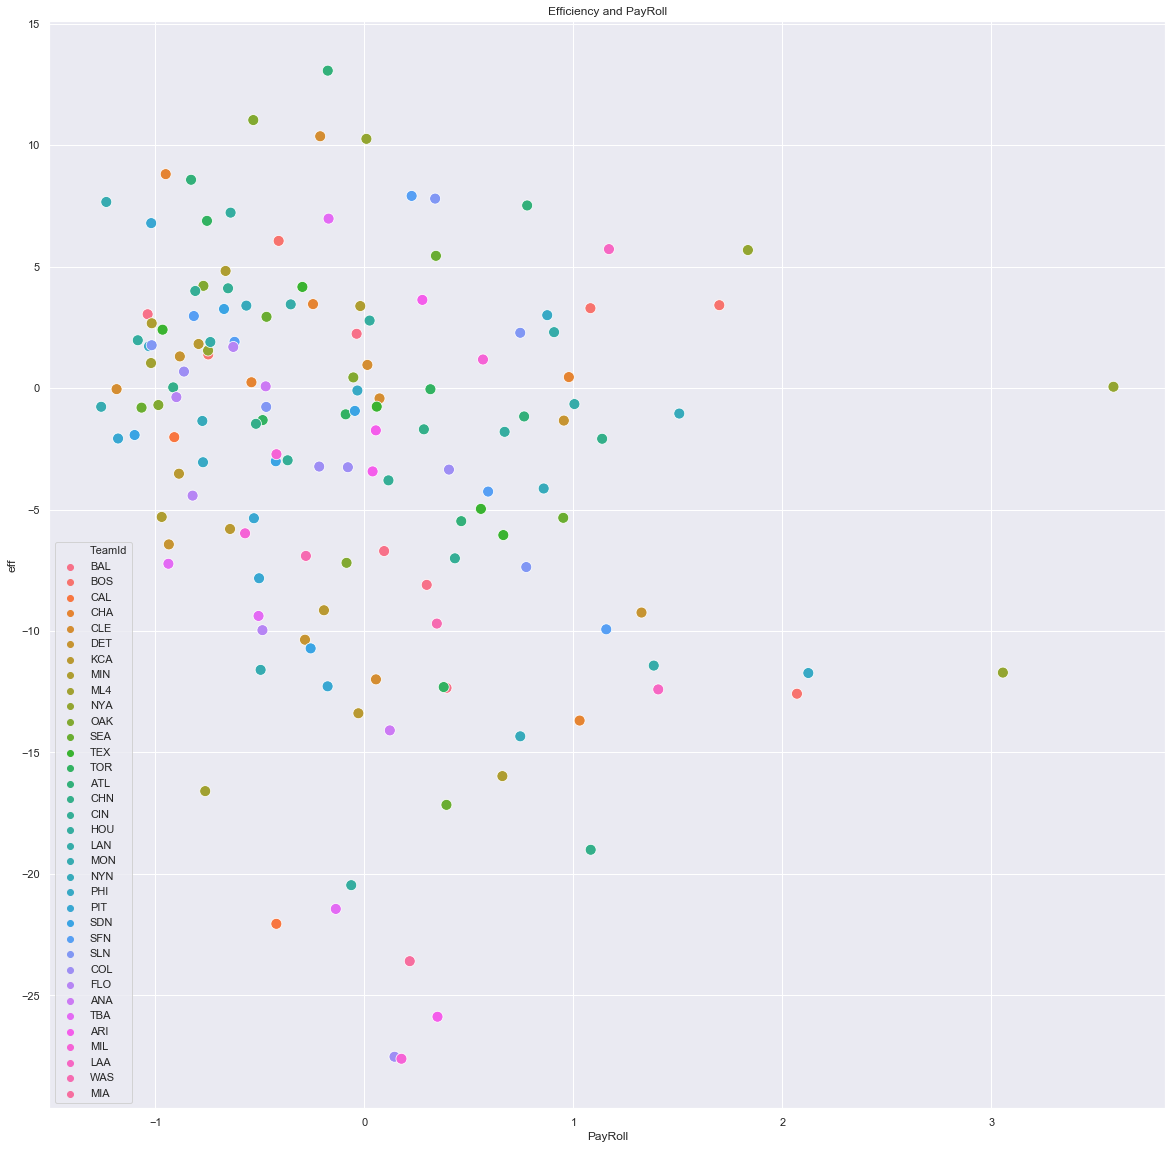

In [25]:


x=[]
y=[]
l=[]
xok=[]
yok=[]

for team in standateamdf:
    for z in team.iterrows():
        temp=z[1]
        
        x.append(temp.Payroll)
        y.append(temp.WinningRate-(50+2.5*temp.Payroll))
        l.append(temp.TeamID)
        if temp.TeamID=="OAK":
            xok.append(temp.Payroll)
            yok.append(temp.WinningRate-(50+2.5*temp.Payroll))
        
        
frame = {'TeamId':l, 'PayRoll': x, 'eff': y } 
  
result = pd.DataFrame(frame)         
#plt.scatter(x, y,l)
#plt.plot(xok, yok)
#plt.scatter(xok, yok)
sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(x= 'PayRoll', y='eff',  hue='TeamId', data=result,s=120)


plt.title('Efficiency and PayRoll')

#plt.show()


At Last we wanted to aswer:How good
was Oakland's efficiency during the Moneyball period"2000"?<br>
And It was obivous that Okland is The Best

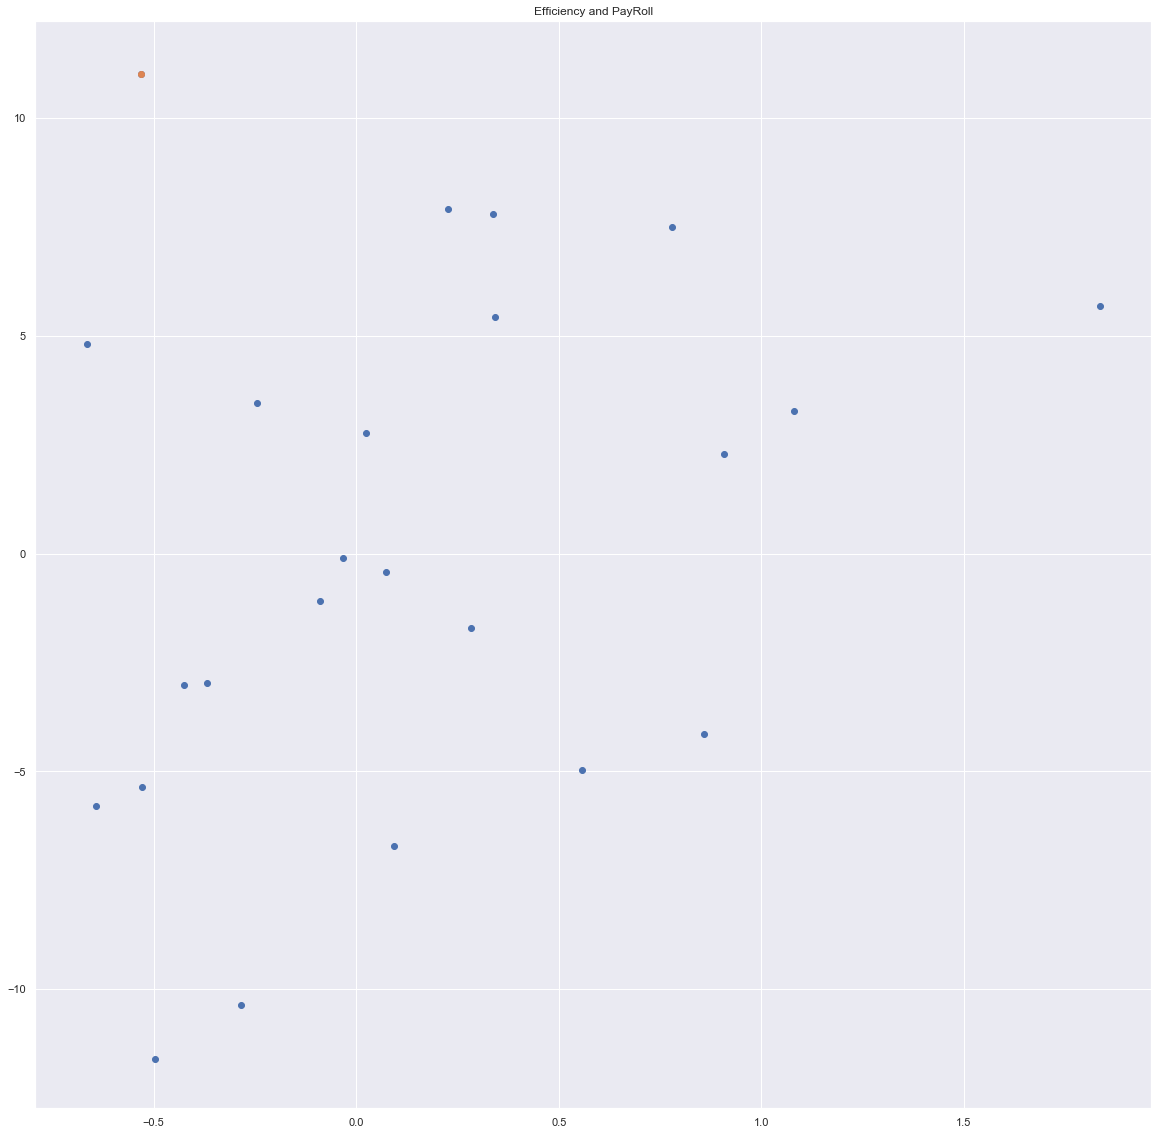

In [26]:
x=[]
y=[]
xok=[]
yok=[]
for team in standateamdf:
    for z in team.iterrows():
        temp=z[1]
        if temp.Startyear == 2000:
            x.append(temp.Payroll)
            y.append(temp.WinningRate-(50+2.5*temp.Payroll))
        if temp.TeamID=="OAK"and temp.Startyear == 2000 :
            xok.append(temp.Payroll)
            yok.append(temp.WinningRate-(50+2.5*temp.Payroll))
        
        
        
plt.scatter(x, y)
plt.scatter(xok, yok)

plt.title('Efficiency and PayRoll')
plt.show()



    
